### Numpy часть

- Выполняется с помощью numpy и базовой функциональности python.
  - [V] Получить датасет [**Ирис**](https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data)
  - [V] Представить датасет одномерный/двумерный массивы (признаки поместить в матрицу `(n, 4)`, названия самого ириса --- вектор размера n). Отобразите сколько места он занимает.
  - [V] Нормализуйте данные на промежуток от 0 до 1 для каждой колонки
  - [V] Представьте один из признаков в виде категориальной переменной и её на три типа используя квантили:
    - < 0.25 --- small
    - 0.25-0.75 --- medium
    - \> 0.75 --- big
  - [V] Разделите датасет на две случайные выборки (0.8 / 0.2)
- Выполняется с помощью пакетов sklearn и numpy
  - [V] Выберите один из [методов классификации](https://scikit-learn.org/stable/supervised_learning.html) (к примеру, [SVC](https://scikit-learn.org/stable/modules/svm.html)), обучите на тренировочном датасете, оцените результат на тестовом и сделайте выводы
  - [V] Проведите три эксперимента изменяя гиперпараметры модели или условия препроцессинга данных (например, нормализованные или нет данные), **сделайте выводы**
  - [V] Пользуясь методами [уменьшения размерности](https://ru.wikipedia.org/wiki/%D0%A1%D0%BD%D0%B8%D0%B6%D0%B5%D0%BD%D0%B8%D0%B5_%D1%80%D0%B0%D0%B7%D0%BC%D0%B5%D1%80%D0%BD%D0%BE%D1%81%D1%82%D0%B8) ([PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html), [t-sne](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html)) визуализируйте датасет.
  Это должен быть scatter plot, где точка это отдельный ирис, ее координаты -- признаки со сжатой выбранной вам размерностью, а цвет -- тип ириса. Нарисуйте этот график дважды, где
    - Тип ириса выбирается из оригинальных данных
    - Тип ириса выбирается из предсказанных данных

#### Импортируем библиотеки

In [68]:
import numpy as np
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

#### Получаем датасет

In [69]:
with open('iris_data.csv', 'r') as file:
    iris = [line.strip().split(',') for line in file]

#### Представляем датасет

In [70]:
X = [line[:4] for line in iris]
Y = [line[4:] for line in iris]
X = np.array(X, dtype=float)
Y = np.array(Y)
unique, Y = np.unique(Y, return_inverse=True)
Y = Y.reshape(-1)
X.shape

(150, 4)

In [71]:
Y.shape

(150,)

In [72]:
X.nbytes + Y.nbytes

6000

#### Нормализуем

In [73]:
def normalize(data):
    min_vals = np.min(data, axis=0)
    max_vals = np.max(data, axis=0)
    normalized = (data - min_vals) / (max_vals - min_vals)
    return normalized

X_norm = normalize(X)
print(X_norm[:5])

[[0.22222222 0.625      0.06779661 0.04166667]
 [0.16666667 0.41666667 0.06779661 0.04166667]
 [0.11111111 0.5        0.05084746 0.04166667]
 [0.08333333 0.45833333 0.08474576 0.04166667]
 [0.19444444 0.66666667 0.06779661 0.04166667]]


#### Представляем один из признаков в виде категориальной переменной и её на три типа используя квантили

In [74]:
sepal_norm = X_norm[:, 0]
q25 = np.quantile(sepal_norm, 0.25)
q75 = np.quantile(sepal_norm, 0.75)

for i in range(len(sepal_norm)):
    if sepal_norm[i] <= q25:
        sepal_norm[i] = 0
    elif sepal_norm[i] <= q75:
        sepal_norm[i] = 1
    else:
        sepal_norm[i] = 2

X_norm[::5]

array([[0.        , 0.625     , 0.06779661, 0.04166667],
       [1.        , 0.79166667, 0.11864407, 0.125     ],
       [1.        , 0.70833333, 0.08474576, 0.04166667],
       [1.        , 1.        , 0.08474576, 0.125     ],
       [1.        , 0.58333333, 0.11864407, 0.04166667],
       [0.        , 0.41666667, 0.10169492, 0.04166667],
       [0.        , 0.45833333, 0.10169492, 0.04166667],
       [0.        , 0.5       , 0.03389831, 0.04166667],
       [0.        , 0.625     , 0.05084746, 0.08333333],
       [0.        , 0.41666667, 0.06779661, 0.08333333],
       [2.        , 0.5       , 0.62711864, 0.54166667],
       [1.        , 0.33333333, 0.59322034, 0.5       ],
       [0.        , 0.        , 0.42372881, 0.375     ],
       [2.        , 0.45833333, 0.57627119, 0.54166667],
       [1.        , 0.5       , 0.6440678 , 0.70833333],
       [2.        , 0.41666667, 0.57627119, 0.54166667],
       [1.        , 0.16666667, 0.47457627, 0.41666667],
       [1.        , 0.58333333,

#### Разделяем датасет на две случайные выборки (0.8 / 0.2)

In [75]:
np.random.seed(52)
indices = np.random.permutation(len(X))

split_index = int(0.8 * len(X))

X_train, X_test = X[indices[:split_index]], X[indices[split_index:]]
y_train, y_test = Y[indices[:split_index]], Y[indices[split_index:]]

In [76]:
X_test

array([[5.7, 3. , 4.2, 1.2],
       [5.7, 4.4, 1.5, 0.4],
       [6.5, 3. , 5.2, 2. ],
       [5. , 3. , 1.6, 0.2],
       [4.6, 3.4, 1.4, 0.3],
       [5.8, 2.7, 3.9, 1.2],
       [5.8, 2.7, 5.1, 1.9],
       [5.8, 2.8, 5.1, 2.4],
       [6.7, 3.1, 4.4, 1.4],
       [6.3, 2.8, 5.1, 1.5],
       [5.6, 2.9, 3.6, 1.3],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.4, 1.7, 0.2],
       [6.1, 2.9, 4.7, 1.4],
       [6.4, 3.1, 5.5, 1.8],
       [6.1, 2.8, 4. , 1.3],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.4, 1.5, 0.2],
       [6.7, 3.1, 5.6, 2.4],
       [4.4, 3.2, 1.3, 0.2],
       [6.5, 2.8, 4.6, 1.5],
       [6.3, 2.5, 5. , 1.9],
       [5.4, 3.9, 1.3, 0.4],
       [5.4, 3.9, 1.7, 0.4],
       [5.5, 4.2, 1.4, 0.2],
       [6.2, 2.9, 4.3, 1.3],
       [6.9, 3.1, 5.4, 2.1],
       [6.7, 3.1, 4.7, 1.5],
       [4.3, 3. , 1.1, 0.1],
       [4.8, 3.4, 1.6, 0.2]])

In [77]:
y_test

array([1, 0, 2, 0, 0, 1, 2, 2, 1, 2, 1, 0, 0, 1, 2, 1, 0, 0, 2, 0, 1, 2,
       0, 0, 0, 1, 2, 1, 0, 0])

##### Обучаем на тренировочном датасете

In [78]:
base_model = SVC(random_state=42)
base_model.fit(X_train, y_train)

y_pred_base = base_model.predict(X_test)

accuracy_base = accuracy_score(y_test, y_pred_base)
f1_base = f1_score(y_test, y_pred_base, average='weighted')

accuracy_base, f1_base

(0.9666666666666667, 0.9664327485380118)

#### Вывод: базовая модель SVC показывает хорошую точность на тестовой выборке

## Эксперименты

Разные ядра

In [79]:
kernels = ['linear', 'rbf', 'poly']
for kernel in kernels:
    model_exp = SVC(kernel=kernel, random_state=42)
    model_exp.fit(X_train, y_train)
    y_pred_exp = model_exp.predict(X_test)
    acc = accuracy_score(y_test, y_pred_exp)
    print(f"  Ядро '{kernel}': точность = {acc}")

  Ядро 'linear': точность = 1.0
  Ядро 'rbf': точность = 0.9666666666666667
  Ядро 'poly': точность = 0.9666666666666667


#### Вывод: лучшее ядро - linear

Разные значения гиперпараметра С

In [80]:
c_values = [0.1, 1.0, 10.0]
for c in c_values:
    model_exp = SVC(C=c, random_state=42)
    model_exp.fit(X_train, y_train)
    y_pred_exp = model_exp.predict(X_test)
    acc = accuracy_score(y_test, y_pred_exp)
    print(f"  C={c}: точность = {acc}")

  C=0.1: точность = 1.0
  C=1.0: точность = 0.9666666666666667
  C=10.0: точность = 0.9666666666666667


#### Вывод: лучший гиперпараметр С - 0.1

Нормализованные и ненормализованные

In [81]:
X_norm_train, X_norm_test, y_norm_train, y_norm_test = train_test_split(X_norm, Y,
    test_size=0.2,
    random_state=42,
    stratify=Y
)

svc_norm = SVC(kernel = 'linear', random_state=42)
svc_norm.fit(X_norm_train, y_norm_train)

y_pred_norm = svc_norm.predict(X_norm_test)

F1_norm = f1_score(y_norm_test, y_pred_norm, average='macro')
accuracy_norm = accuracy_score(y_norm_test, y_pred_norm)

accuracy_norm, F1_norm

(0.9333333333333333, 0.9333333333333332)

#### Вывод: нормализованные данные хуже ненормализованных

## Уменьшаем данные и визуализируем

In [85]:
svc = SVC()
svc.fit(X_train, y_train)

y_combined_pred = svc.predict(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

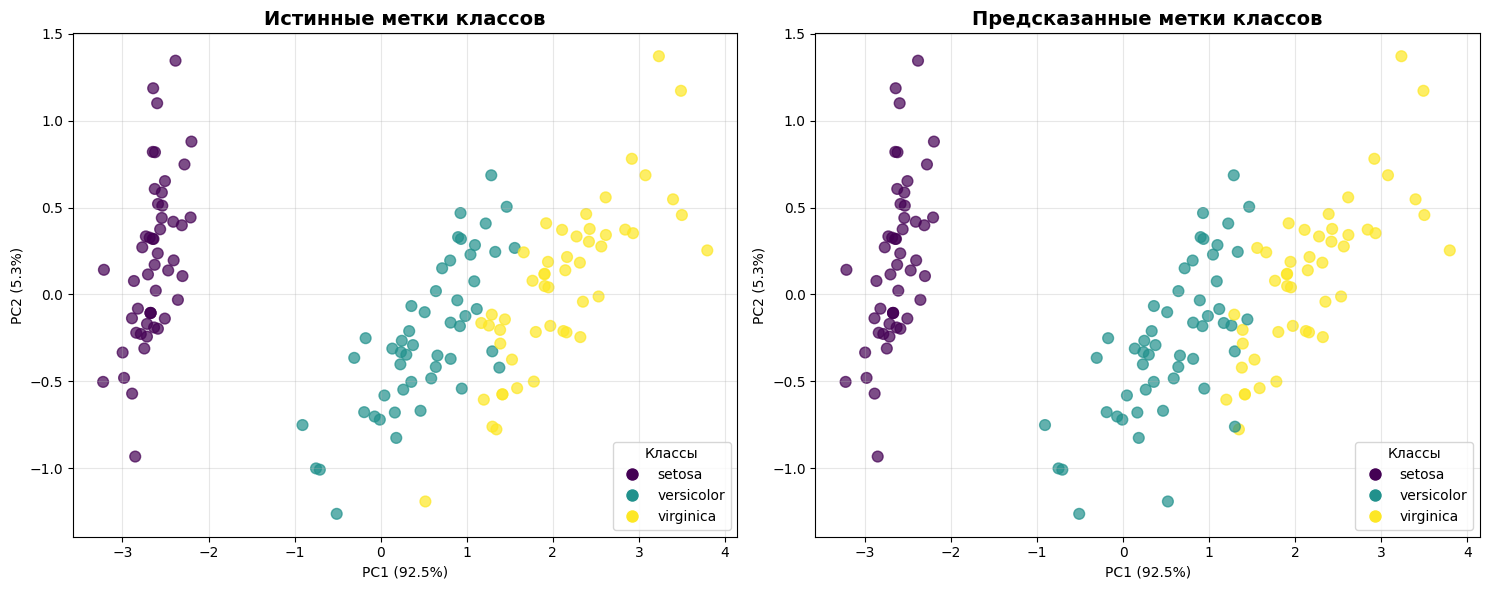

In [88]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

scatter1 = ax1.scatter(X_pca[:, 0], X_pca[:, 1], c=Y, cmap='viridis', alpha=0.7, s=60)
ax1.set_title('Истинные метки классов', fontsize=14, fontweight='bold')
ax1.set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.1%})')
ax1.set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.1%})')

legend_elements1 = [plt.Line2D([0], [0], marker='o', color='w', 
                              markerfacecolor=plt.cm.viridis(i/2), 
                              markersize=10, label=name) 
                   for i, name in enumerate(['setosa', 'versicolor', 'virginica'])]
ax1.legend(handles=legend_elements1, title="Классы")
ax1.grid(alpha=0.3)

scatter2 = ax2.scatter(X_pca[:, 0], X_pca[:, 1], c=y_combined_pred, cmap='viridis', alpha=0.7, s=60)
ax2.set_title('Предсказанные метки классов', fontsize=14, fontweight='bold')
ax2.set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.1%})')
ax2.set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.1%})')

legend_elements2 = [plt.Line2D([0], [0], marker='o', color='w', 
                              markerfacecolor=plt.cm.viridis(i/2), 
                              markersize=10, label=name) 
                   for i, name in enumerate(['setosa', 'versicolor', 'virginica'])]
ax2.legend(handles=legend_elements2, title="Классы")
ax2.grid(alpha=0.3)

plt.tight_layout()
plt.show()